<a href="https://colab.research.google.com/github/Ayanlola2002/Stutern/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Loading Neccessary python libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')

In [0]:
#loding dataset
df=pd.read_csv('/content/StudentsPerformance (5).csv')
df.shape

(1000, 8)

In [0]:
#Summary statistics of Datatypes
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [0]:
#Summary Metric for data description
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [0]:

def histograms_plot(dataframe, features, rows, cols):
   fig=plt.figure(figsize=(20,20))
   for i, feature in enumerate(features):
     ax=fig.add_subplot(rows,cols,i+1)
     dataframe[feature].hist(bins=20,ax=ax,facecolor='green')
     ax.set_title(feature+" Distribution",color='red')
     fig.tight_layout()  
     plt.show()

In [0]:
#histograms_plot(df,df.columns,1000,3)

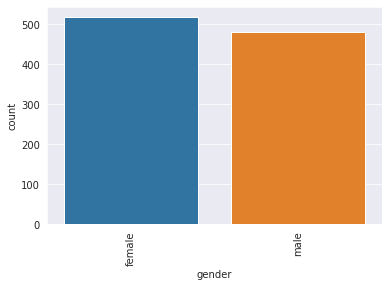

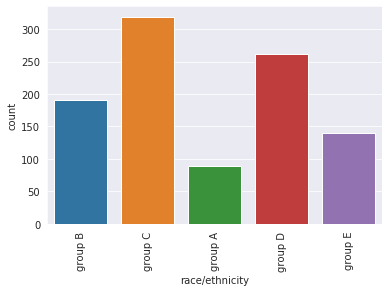

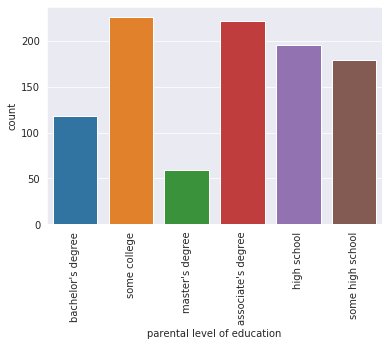

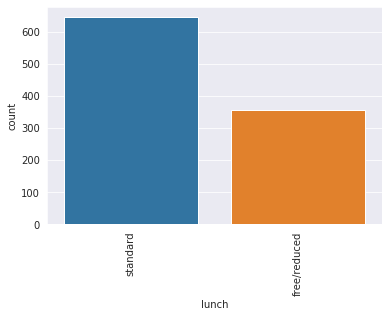

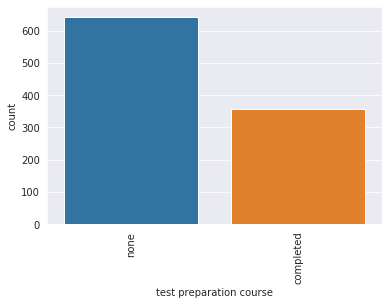

In [0]:
#Data distribution of categorical varriable
df1 = df.select_dtypes([np.object])

for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df1)
    plt.xticks(rotation = 90)

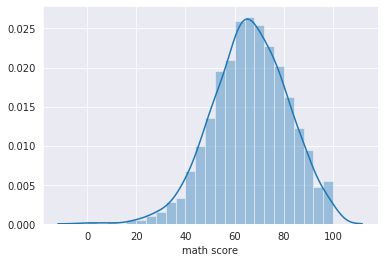

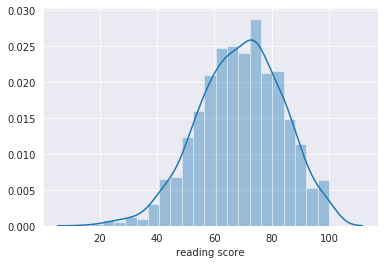

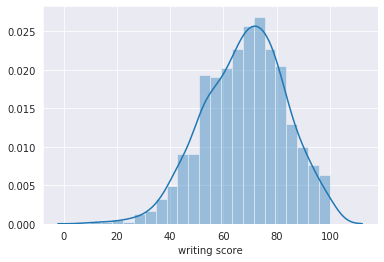

In [0]:
#Distribution of Continous varriable
df2 = df.select_dtypes([np.int, np.float])

for i, col in enumerate(df2.columns):
    plt.figure(i)
    sns.distplot(df2[col])

In [0]:
#Adding new varriable
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score'] 
df['Average_Score'] = df['Total_Marks']/3 

In [0]:
#Function Implementing WAEC grading system into dataset
def score_to_grade(score):
    breakpoints = [40,45,50,55,60,65,70,85, 101]
    grades = ['F9', 'E8', 'D7', 'C6', 'C5', 'C4','B3','B2','A1']
    for breakpoint, grade in zip(breakpoints, grades):
        if score < breakpoint:
            return grade


In [0]:
#New Varriable Averge Category
df["Average_Score_cat"]=df.apply(lambda x:score_to_grade(x['Average_Score']),axis=1)

In [0]:
#Description of all varriables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
Total_Marks                    1000 non-null int64
Average_Score                  1000 non-null float64
Average_Score_cat              1000 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 86.1+ KB


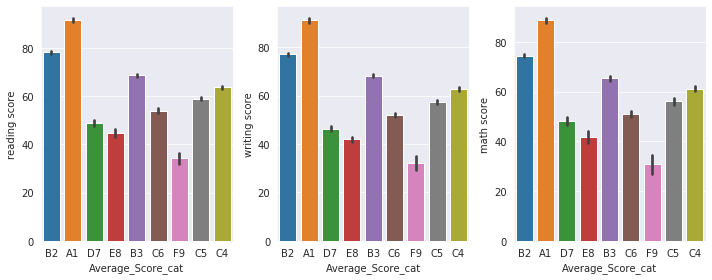

In [0]:
#Bar Plots Showing relationship between each varriable and Average_Score_cat
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
sns.barplot(x = "Average_Score_cat", y = 'reading score', data = df)

plt.subplot(1,3,2)
sns.barplot(x = "Average_Score_cat", y = 'writing score', data = df)

plt.subplot(1,3,3)
sns.barplot(x = "Average_Score_cat", y = 'math score', data = df)





plt.tight_layout()

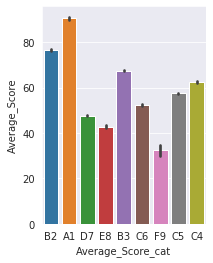

In [0]:
#Plots Showing relationship between Target varriable and Average Score
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
sns.barplot(x = "Average_Score_cat", y = 'Average_Score', data = df)

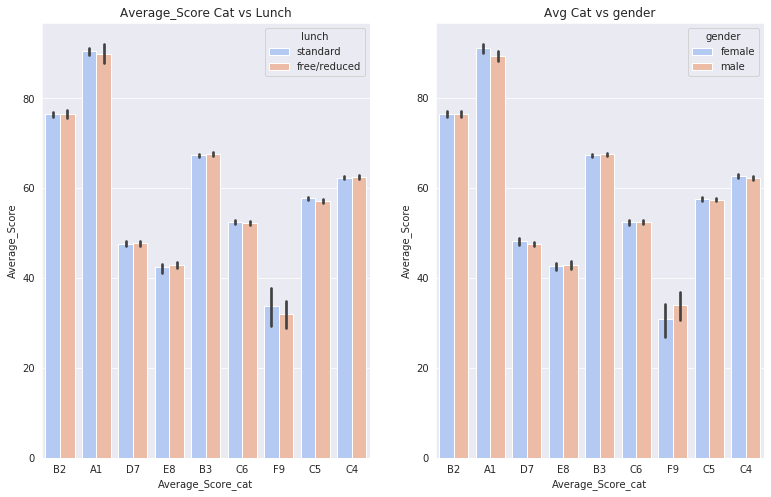

In [0]:
#Plots Showing relationship between Target varriable and Lunch,Gender
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
sns.barplot(x='Average_Score_cat',y='Average_Score',data=df,hue='lunch',palette='coolwarm')
plt.title('Average_Score Cat vs Lunch')
plt.subplot(1, 3, 2)
sns.barplot(x='Average_Score_cat',y='Average_Score',data=df,hue='gender',palette='coolwarm')
plt.title('Avg Cat vs gender')

plt.show()

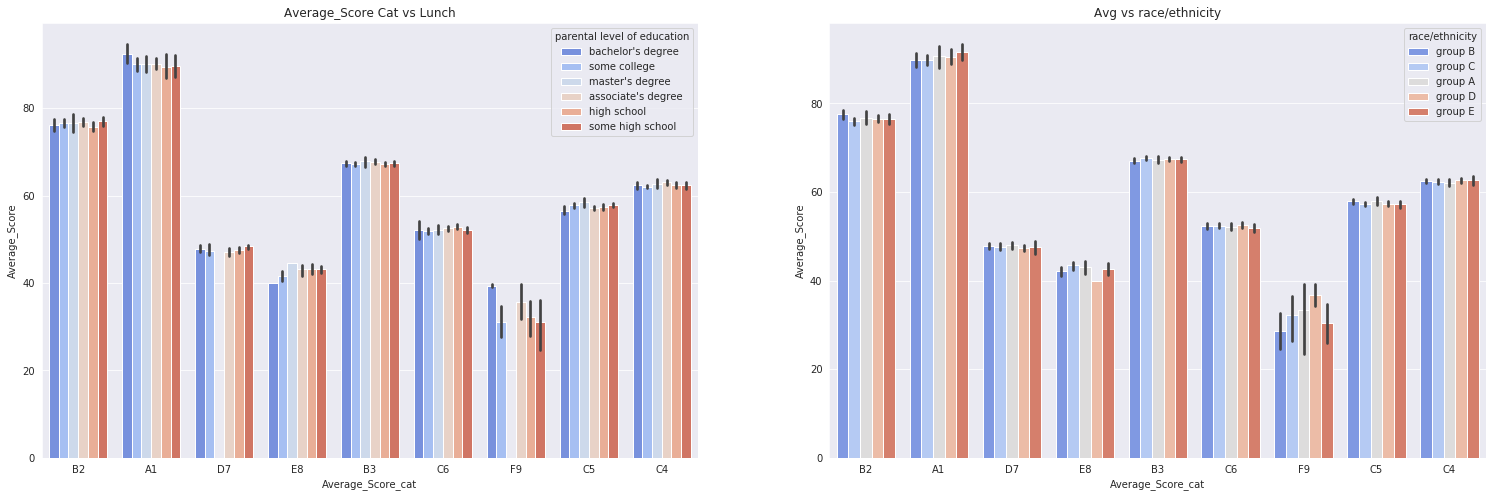

In [0]:
plt.figure(figsize=(40,8))
plt.subplot(1, 3, 1)
sns.barplot(x='Average_Score_cat',y='Average_Score',data=df,hue='parental level of education',palette='coolwarm')
plt.title('Average_Score Cat vs Lunch')

plt.subplot(1, 3, 2)
sns.barplot(x='Average_Score_cat',y='Average_Score',data=df,hue='race/ethnicity',palette='coolwarm')
plt.title('Avg vs race/ethnicity')
plt.show()


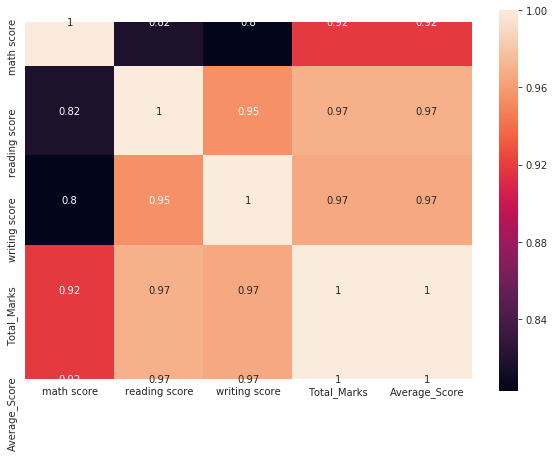

In [0]:
matrix =df.corr() 
f, ax = plt.subplots(figsize=(10, 7)) 
sns.heatmap(matrix,annot=True, square=True)

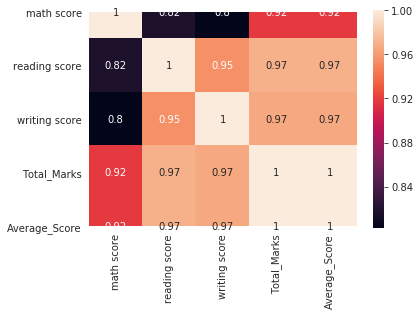

In [0]:
#sns.heatmap(df.corr(), square=True, annot=True)

In [0]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
Total_Marks                    0
Average_Score                  0
Average_Score_cat              0
dtype: int64

HYPOTHESIS Creation

1.Parents with High level of Education Should have high impact in their children's Academic performance education.
2.Test preparation Should be responsible for better student performance
3.Student who are well nuriched should have better  better  performance
4.Race/Ethniticity should have nothing to do with student performance